In [51]:
#IMPORT LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.datasets import load_boston


In [52]:
#LOAD DATASET

X=load_boston()
X

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [53]:
#CREATE 2 DATASETS SEPRATE INPUT AND OUTPUT

data=pd.DataFrame(X.data,columns=X.feature_names)
target=pd.DataFrame(X.target,columns=['target'])

In [54]:
#ASSIGN VALUES TO X AND Y VARIABLE

x=data[['AGE']]
y=target[['target']]

In [55]:
#ADD CONSTANT =(C) FOR Y=MX+C 

x=sm.add_constant(x)
x

C:\Users\Arbaj\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,AGE
0,1.0,65.2
1,1.0,78.9
2,1.0,61.1
3,1.0,45.8
4,1.0,54.2
...,...,...
501,1.0,69.1
502,1.0,76.7
503,1.0,91.0
504,1.0,89.3


In [56]:
#REGRESSION MODEL CREATE USING SM FUNCTION OLS
#PREDICT THE Y VALUE ON X DATA

reg=sm.OLS(y,x)
model=reg.fit()
pred=model.predict(x)


In [57]:
#CALCULATING TARGET MEAN TO MAKE CALCULATION THE REAL DATA FROM MEAN DATA CALLED AS (SQUARED_ERROR) AND SQUARING THEM FOR (SSE_MEAN)
#FROM PREDICTED VALUE TO REAL VALUE CALLED AS (PREDICTED_ERROR) SQUARING MAKE IT (SSE_OLS)

mean=target['target'].mean()
SSE_mean=np.sum((mean-target['target'])**2)    #SSR=sum of squared error
SSE_OLS=np.sum((pred-target['target'])**2)


In [58]:
#SQUARED ERROR AND PRESICTED_ERROR

SQUARED_ERROR=pd.Series((mean-target['target'])**2)

PREDICTED_ERROR=pd.Series((pred-target['target'])**2)

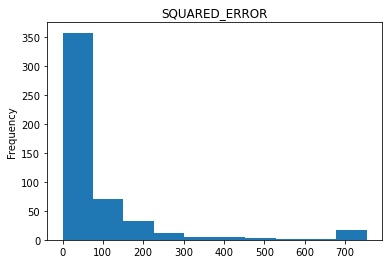

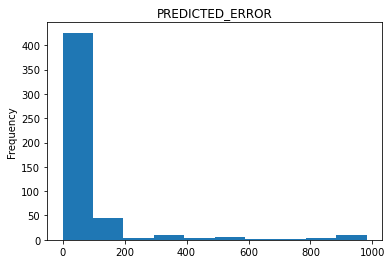

In [59]:
#SQUARED_ERROR AND PREDICTED_ERROR MUST BE LEAST AS POSSIBLE SO ALLSHOULD MUST LYING ON 0 TO 100 COLUMN BUT SOME ARE ABOVE 100,
#200,700,THISE REPRESENTS THE DISTANCE BETWEEN THEM IS HIGHER SO WE WANT TO REDUCE IS AND MAKE IT SMALLER AN LYIE ON 0 TO 100
#IN SQUARED_ERROR MORE NUMBERS OF DATA POINTS (DISTANCE BET REAL AND PREDICTED) IS OUTSIDE THE 0,100 COLUMN
#OLS PERFORM BETTER THAN SQUARED SHOWS THE GRAPH (LESSS VALUES OF DISTANCE FROM REAL POINTS)

import seaborn as sns

SQUARED_ERROR.plot(kind='hist')
plt.title('SQUARED_ERROR')
plt.show()
PREDICTED_ERROR.plot(kind='hist')
plt.title('PREDICTED_ERROR')
plt.show()

In [63]:
#R SQUARE
# REMAINING ERROR AFTER OLS
#MAKE THAT AS LEAST AS POSSIBLE WHEN IT BECOME 0 THEN PREDICTED POINT IS ON REAL POINT

(SSE_mean-SSE_OLS)/SSE_OLS


0.16562987940324636

In [61]:
mean=target['target'].mean()
mean

22.532806324110698